#Calculating the average prices by Unit of Issue (UI)

<ipython-input-3-015e5a30ee75>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_bar.index, y=df_bar.values, palette="rainbow")  # Use grouped data for plotting


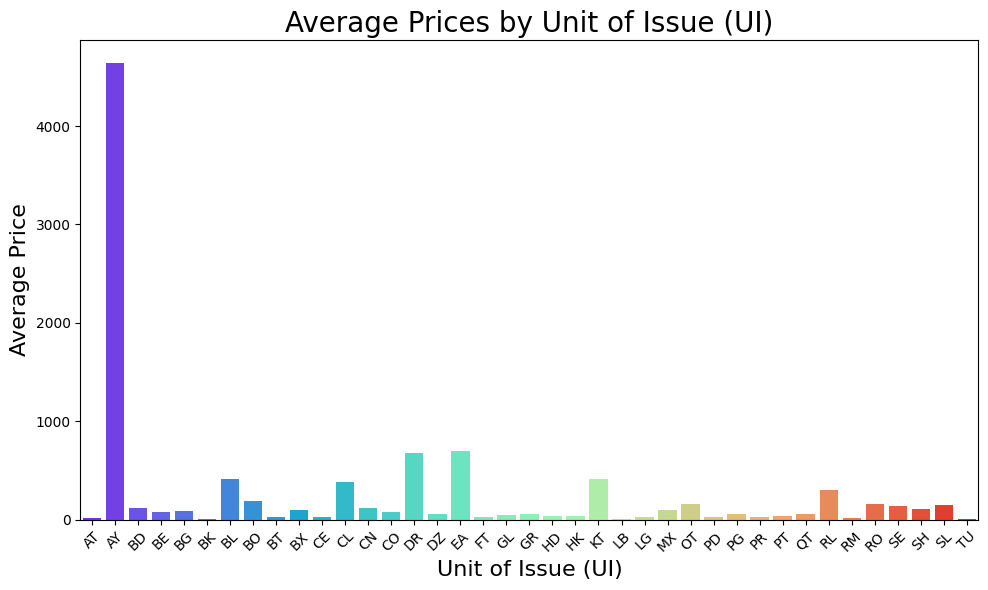

,Price
UI,
AT,11.093333
AY,4639.453333
BD,119.586081
BE,78.136667
BG,84.389259
BK,9.016000
BL,415.500000
BO,185.832000
BT,26.850000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Load dataset
data_dir = 'nsn dataset.xlsx'
data = pd.read_excel(data_dir)

# Calculate the population mean price for each UI
df_bar = data.groupby('UI')['Price'].mean()

# Create a barplot for average prices by UI
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x=df_bar.index, y=df_bar.values, palette="rainbow")  # Use grouped data for plotting
plt.title('Average Prices by Unit of Issue (UI)', fontsize=20)
plt.xlabel('Unit of Issue (UI)', fontsize=16)
plt.ylabel('Average Price', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print('\n')

# Display a pivot table
# Using the data, the UI will be the rows and the average price will be the values
df = pd.pivot_table(data, values='Price', index='UI', aggfunc='mean')
display(df)


# Calculating the p value in terms of the Prices and UI

pvalues: [0.00000000e+00 9.07912154e-03 0.00000000e+00 0.00000000e+00
 3.27293748e-13 0.00000000e+00 4.46915505e-07 0.00000000e+00
 0.00000000e+00 3.64652386e-02 0.00000000e+00 0.00000000e+00
 3.84084879e-03 0.00000000e+00 1.92798618e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51005031e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.44089210e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.96125035e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


<ipython-input-4-7eb5e01a85e0>:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_value, kde=True, color="blue")


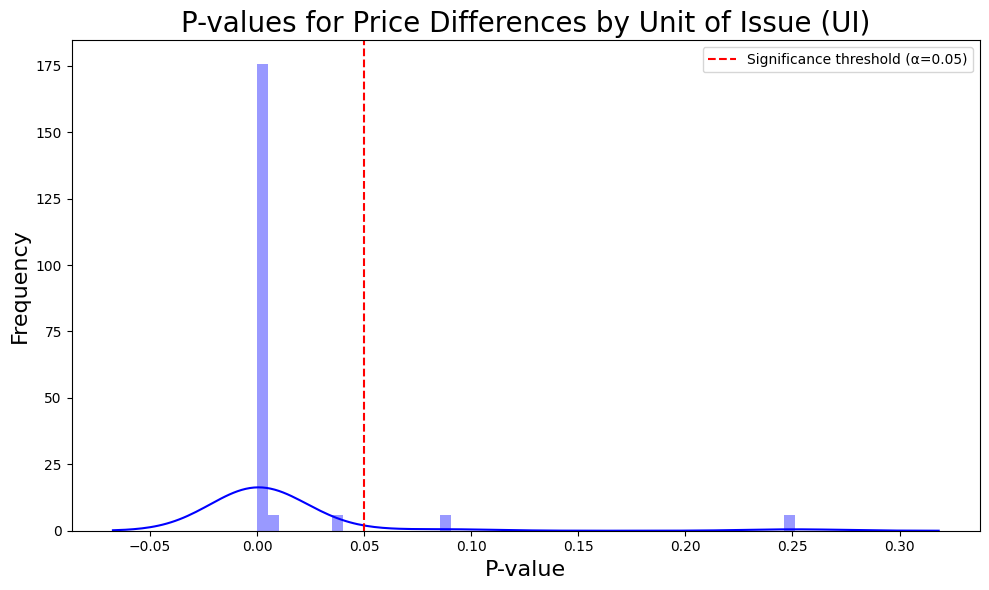

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats # Use for calculating the pvalue

# Load dataset
data_dir = 'nsn dataset.xlsx'
data = pd.read_excel(data_dir)

# Calculate the population mean price for each UI
df_bar = data.groupby('UI')['Price'].mean()

# Calculate the standard deviation
df_std = data.groupby('UI')['Price'].std()

# Calculate the sample mean
# Use 'frac=1' to sample all elements in each group defined by 'UI'
df_sample_mean = data.groupby('UI')['Price'].sample(frac=1).mean()

# Calculate the sample size
df_sample_size = data.groupby('UI')['Price'].size()

# Calculate the test statistic for the z distribution, replacing positive and negative infinite values with NaN
df_zdist = (df_bar - df_sample_mean) / ((df_std)/(df_sample_size.apply(math.sqrt)))
df_zdist = df_zdist.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN

# Drop rows with NaN values in 'df_zdist' before plotting
# to ensure that seaborn.distplot receives only valid numerical data
df_zdist = df_zdist.dropna()

# Then calculate the actual p-value from this test statistic
# For a two-tailed test:
p_value = 2 * (1 - stats.norm.cdf(abs(df_zdist)))

#print the pvlaue
print("pvalues:", p_value)

# Create a distribution plot for the p value
plt.figure(figsize=(10, 6))  # Set figure size
# kde=True: This adds a Kernel Density Estimation plot on top of the histogram
# for a smoother representation of the distribution.
sns.distplot(p_value, kde=True, color="blue")
plt.title('P-values for Price Differences by Unit of Issue (UI)', fontsize=20)
plt.xlabel('P-value', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.axvline(0.05, color='red', linestyle='--', label='Significance threshold (α=0.05)')
plt.legend()
plt.tight_layout()
plt.show()

print('\n')
